In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sn

In [2]:
df=pd.read_csv("drug_deaths.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,...,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,...,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,...,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Date', 'DateType', 'Age', 'Sex', 'Race',
       'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity',
       'DeathCounty', 'Location', 'LocationifOther', 'DescriptionofInjury',
       'InjuryPlace', 'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD',
       'OtherSignifican', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
       'Other', 'OpiateNOS', 'AnyOpioid', 'MannerofDeath', 'DeathCityGeo',
       'ResidenceCityGeo', 'InjuryCityGeo'],
      dtype='object')

In [5]:
df.shape

(5105, 42)

In [6]:
df.isna().sum()

Unnamed: 0                0
ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                    0
Cocaine                   0
Fentanyl                  0
Fentanyl_Analogue         0
Oxycodone                 0
Oxymorphone               0
Ethanol                   0
Hydrocodone               0
Benzodiazepine            0
Methadone                 0
Amphet                    0
Tramad                    0
Morphine_NotHeroin        0
Hydromorphone             0
Other               

In [7]:
selected_colms = ["Age","Sex","Race",
        'Heroin', 'Cocaine','Oxycodone', 
       'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Hydromorphone',
       'OpiateNOS', 'MannerofDeath']
df = df[selected_colms]

In [8]:
df.shape

(5105, 16)

In [9]:
df.head()

,Age,Sex,Race,Heroin,Cocaine,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS,MannerofDeath
0,NaN,NaN,NaN,0,0,0,0,0,1,1,0,0,0,0,0,Accident
1,48.0,Male,Black,0,1,0,0,0,0,0,0,0,0,0,0,Accident
2,30.0,Female,White,1,1,0,0,0,0,0,0,0,0,0,0,Accident
3,23.0,Male,White,1,0,0,0,0,0,0,0,0,0,0,0,Accident
4,22.0,Male,"Asian, Other",0,0,0,0,0,0,0,0,0,0,0,0,Accident


In [10]:
# checking number of missing values
df.isna().sum()

Age                3
Sex                6
Race              13
Heroin             0
Cocaine            0
Oxycodone          0
Oxymorphone        0
Ethanol            0
Hydrocodone        0
Benzodiazepine     0
Methadone          0
Amphet             0
Tramad             0
Hydromorphone      0
OpiateNOS          0
MannerofDeath     10
dtype: int64

In [11]:
# filling missing values
df.fillna(df.mean(),inplace=True) #numerical missing values are replaced with mean
df = df.fillna(method='ffill') #categorical missing values are replaced with previous value

In [12]:
df.isna().sum()

Age               0
Sex               1
Race              1
Heroin            0
Cocaine           0
Oxycodone         0
Oxymorphone       0
Ethanol           0
Hydrocodone       0
Benzodiazepine    0
Methadone         0
Amphet            0
Tramad            0
Hydromorphone     0
OpiateNOS         0
MannerofDeath     0
dtype: int64

In [13]:
# dropping the remaining missing rows
df = df.dropna() 

In [14]:
df.isna().sum()

Age               0
Sex               0
Race              0
Heroin            0
Cocaine           0
Oxycodone         0
Oxymorphone       0
Ethanol           0
Hydrocodone       0
Benzodiazepine    0
Methadone         0
Amphet            0
Tramad            0
Hydromorphone     0
OpiateNOS         0
MannerofDeath     0
dtype: int64

In [15]:
num_male = 0
num_female = 0
for gender in df["Sex"].values:
    if(gender == "Male"):
        num_male += 1
    else:
        num_female +=1

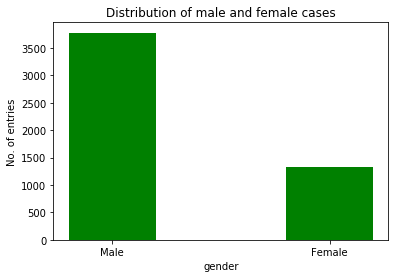

In [16]:
x = ["Male","Female"]
y = [num_male,num_female]
plt.bar(x, y, color ='green',  
        width = 0.4) 
plt.xlabel("gender") 
plt.ylabel("No. of entries") 
plt.title("Distribution of male and female cases") 
plt.show() 

In [17]:
len(df['MannerofDeath'].unique())

5

In [18]:
set(df["MannerofDeath"])

{'ACCIDENT', 'Accident', 'Natural', 'Pending', 'accident'}

In [19]:
df["y"] = np.where(df["MannerofDeath"].isin(['ACCIDENT', 'Accident','accident']),"1","0").astype("int")

In [20]:
df = df.drop(["MannerofDeath"],axis=1)
df.head()

,Age,Sex,Race,Heroin,Cocaine,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS,y
1,48.0,Male,Black,0,1,0,0,0,0,0,0,0,0,0,0,1
2,30.0,Female,White,1,1,0,0,0,0,0,0,0,0,0,0,1
3,23.0,Male,White,1,0,0,0,0,0,0,0,0,0,0,0,1
4,22.0,Male,"Asian, Other",0,0,0,0,0,0,0,0,0,0,0,0,1
5,23.0,Male,White,1,0,0,0,0,0,0,0,0,0,0,0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5104 entries, 1 to 5104
Data columns (total 16 columns):
Age               5104 non-null float64
Sex               5104 non-null object
Race              5104 non-null object
Heroin            5104 non-null int64
Cocaine           5104 non-null int64
Oxycodone         5104 non-null int64
Oxymorphone       5104 non-null int64
Ethanol           5104 non-null int64
Hydrocodone       5104 non-null int64
Benzodiazepine    5104 non-null int64
Methadone         5104 non-null int64
Amphet            5104 non-null int64
Tramad            5104 non-null int64
Hydromorphone     5104 non-null int64
OpiateNOS         5104 non-null int64
y                 5104 non-null int32
dtypes: float64(1), int32(1), int64(12), object(2)
memory usage: 657.9+ KB


In [22]:
# one hot encoding sex column
df = pd.concat([df,pd.get_dummies(df['Sex'],prefix='gender',dummy_na=False)],axis=1).drop(['Sex'],axis=1)

In [23]:
df.head()

,Age,Race,Heroin,Cocaine,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS,y,gender_Female,gender_Male,gender_Unknown
1,48.0,Black,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,30.0,White,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,23.0,White,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,22.0,"Asian, Other",0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
5,23.0,White,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [24]:
# one hot encoding race column
df = pd.concat([df,pd.get_dummies(df['Race'],prefix='Race',dummy_na=False)],axis=1).drop(['Race'],axis=1)

In [25]:
df.head()

,Age,Heroin,Cocaine,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,...,"Race_Asian, Other",Race_Black,Race_Chinese,Race_Hawaiian,"Race_Hispanic, Black","Race_Hispanic, White","Race_Native American, Other",Race_Other,Race_Unknown,Race_White
1,48.0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,30.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,23.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,23.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
df["Age"].describe()

count    5104.000000
mean       41.964916
std        12.334221
min        14.000000
25%        32.000000
50%        42.000000
75%        52.000000
max        87.000000
Name: Age, dtype: float64

In [27]:
df.corr()

,Age,Heroin,Cocaine,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,...,"Race_Asian, Other",Race_Black,Race_Chinese,Race_Hawaiian,"Race_Hispanic, Black","Race_Hispanic, White","Race_Native American, Other",Race_Other,Race_Unknown,Race_White
Age,1.000000,-0.128915,0.045477,0.121185,0.028566,0.085507,0.073467,0.059185,0.061719,-0.042377,...,-0.032793,0.113124,-0.028840,0.018201,0.004375,0.016429,0.002310,-0.012885,-0.014514,-0.077499
Heroin,-0.128915,1.000000,-0.002267,-0.224882,-0.113035,-0.025427,-0.086336,-0.104105,-0.125376,-0.004023,...,0.013757,-0.070307,0.019978,-0.013873,-0.016565,0.036971,-0.013873,-0.012256,0.015233,0.019208
Cocaine,0.045477,-0.002267,1.000000,-0.116303,-0.063054,-0.044471,-0.059725,-0.127390,-0.062359,0.003989,...,0.004596,0.162278,-0.012900,-0.009121,-0.007214,0.051349,-0.009121,0.025143,-0.005462,-0.150703
Oxycodone,0.121185,-0.224882,-0.116303,1.000000,0.320284,0.005210,0.048878,0.136666,-0.040395,-0.006652,...,-0.011646,-0.033882,-0.007274,-0.005143,-0.007558,-0.038356,-0.005143,-0.004022,0.002392,0.058529
Oxymorphone,0.028566,-0.113035,-0.063054,0.320284,1.000000,0.001944,-0.004327,0.066807,-0.004830,0.004981,...,-0.008747,-0.039941,-0.002911,-0.002058,-0.010106,-0.034322,-0.002058,-0.006833,0.030760,0.053364
Ethanol,0.085507,-0.025427,-0.044471,0.005210,0.001944,1.000000,0.034778,-0.004014,-0.037400,-0.031093,...,-0.010751,0.032639,-0.011258,-0.007960,0.014239,-0.026667,-0.007960,0.003073,0.009400,-0.005222
Hydrocodone,0.073467,-0.086336,-0.059725,0.048878,-0.004327,0.034778,1.000000,0.033417,-0.030967,-0.012394,...,-0.009112,-0.023226,-0.003033,-0.002144,-0.010528,-0.024603,0.091393,-0.007118,-0.010305,0.035095
Benzodiazepine,0.059185,-0.104105,-0.127390,0.136666,0.066807,-0.004014,0.033417,1.000000,0.112504,0.056856,...,-0.005501,-0.105488,0.010662,0.023438,-0.028041,-0.079289,-0.008361,-0.008563,-0.013605,0.141824
Methadone,0.061719,-0.125376,-0.062359,-0.040395,-0.004830,-0.037400,-0.030967,0.112504,1.000000,-0.014633,...,-0.019035,-0.039459,-0.006335,-0.004479,-0.021992,0.003899,-0.004479,-0.014870,-0.011449,0.036610
Amphet,-0.042377,-0.004023,0.003989,-0.006652,0.004981,-0.031093,-0.012394,0.056856,-0.014633,1.000000,...,0.008357,-0.022318,-0.003550,-0.002510,-0.012325,-0.030650,-0.002510,0.015986,-0.012064,0.038404


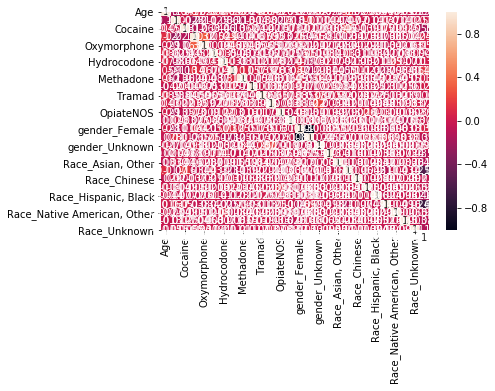

In [28]:
sn.heatmap(df.corr(),annot=True)

In [29]:
y = df["y"].values
x = df.drop(['y'],axis=1).values

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [31]:
print("training set size: ",len(x_train))
print("test set size: ",len(x_test))

training set size:  4083
test set size:  1021


In [32]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
score = []
k = range(1,4)
for i in k:   
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    score.append(metrics.accuracy_score(y_test,y_pred))
score

[0.9951028403525954, 0.9941234084231146, 0.9980411361410382]

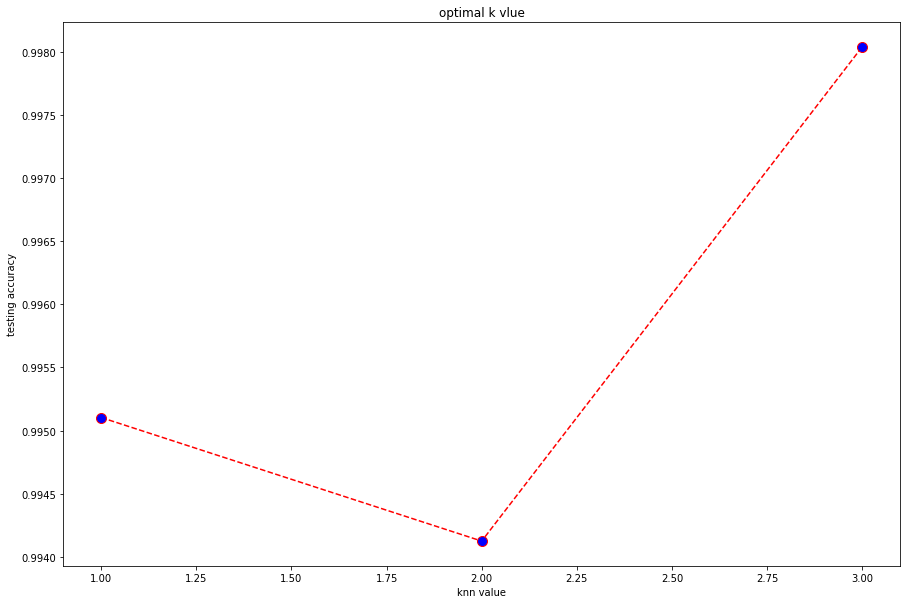

In [34]:
plt.figure(figsize =(15,10))
plt.plot(k,score,markersize = 10,color = 'red',linestyle = 'dashed',marker = 'o',markerfacecolor= 'blue')
plt.title('optimal k vlue')
plt.xlabel('knn value')

plt.ylabel('testing accuracy')
plt.show()

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.9980411361410382